## Assignment Week 7 - Biswajit Sharma

#### Part 1: PCA and Variance Threshold in a Linear Regression

Import the housing data as a data frame and ensure that the data is loaded properly.

In [1]:
# import modules

import pandas as pd
import unicodedata
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score, root_mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Set up display options
pd.options.display.max_columns=80
pd.options.display.max_rows=50
pd.options.display.max_colwidth=80

In [ ]:
# read the dataset into a dataframe
train_df = pd.read_csv("./datasets/train.csv")
test_df = pd.read_csv("./datasets/test.csv")

In [ ]:
# view train rows
train_df.head()

In [ ]:
# view test rows
test_df.head()

Drop the "Id" column and any features that are missing more than 40% of their values.

In [ ]:
df = train_df

In [ ]:
#drop the Id column
df = df.drop(columns="Id")

In [ ]:
# number of rows in dataframe
print(df.shape)
num_rows = df.shape[0]
# create a list of columns with > 40% missing values
column_with_high_number_missing_values = [row[0] for row in (df.isna().sum()).items() if row[1]/num_rows > 0.4]
#drop such columns
df = df.drop(columns=column_with_high_number_missing_values)

In [ ]:
# view few rows
df.shape

For numerical columns, fill in any missing data with the median value.

In [ ]:
#view few rows
df.head()

In [ ]:
# check datatype
df.info()

we see only integer and object datatype

In [ ]:
# select numerical datatypes using pandas select_dtypes function
numerical_columns = df.iloc[0:,0:-1].select_dtypes(include="number").columns.to_list()

In [ ]:
#check if any col has naN anymore
s = df.isna().sum() > 0
s[s != False]

In [ ]:
#replace missing values in numerical columns with median value
for col_name in numerical_columns:
    median = df[col_name].median()
    df[col_name] = df[col_name].fillna(median)

For categorical columns, fill in any missing data with the most common value (mode).

In [ ]:
#check if any col has naN anymore
s = df.isna().sum() > 0
s[s != False]

In [ ]:
# select categorical columns using pandas select_dtypes function
categorical_columns = df.select_dtypes(include="object").columns.to_list()

In [ ]:
#replace missing values in categorical columns with mode i.e. most frequent value
for col_name in categorical_columns:
    mode = df[col_name].mode()
    df[col_name] = df[col_name].fillna(mode[0])

In [ ]:
#check if any col has naN anymore
s = df.isna().sum() > 0
s[s != False]

Convert the categorical columns to dummy variables.

In [ ]:
df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype="int")

In [ ]:
# view few rows
df_with_dummies.head()

Split the data into a training and test set, where the SalePrice column is the target.

In [ ]:
target = "SalePrice"
features = [cols for cols in df_with_dummies.columns if cols != "SalePrice"]

In [ ]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_with_dummies[features], df_with_dummies[target], test_size=0.2, random_state=1
)

Run a linear regression and report the R2-value and RMSE on the test set.

In [ ]:
features_train

In [ ]:
# create a standardscaler as linear regression coefficients may depends on scale of the features
stdscaler = StandardScaler()

In [ ]:
#create linear regression object
linear_reg = LinearRegression()

In [ ]:
#fit training data
model1 = linear_reg.fit(features_train, target_train)

In [ ]:
# get predicted values for test set
predicted_target_test = model1.predict(features_test)

In [ ]:
# calculate R squared
print(f"Test R2: {r2_score(target_test, predicted_target_test)}")

In [ ]:
# claulate RMSE 
print(f"Test RMSE: {root_mean_squared_error(target_test, predicted_target_test)}")

Fit and transform the training features with a PCA so that 90% of the variance is retained.

In [ ]:
pca = PCA(n_components=0.90, whiten=True)

In [ ]:
pca.fit(features_train)

In [ ]:
features_train_pca = pca.transform(features_train)

How many features are in the PCA-transformed matrix?

In [ ]:
print(f"Number of Features in transformed matrix: {features_train_pca.shape[1]}")

Transform but DO NOT fit the test features with the same PCA.

In [ ]:
features_test_pca = pca.transform(features_test)

Repeat step 7 with your PCA transformed data.

In [ ]:
model2 = linear_reg.fit(features_train_pca, target_train)

In [ ]:
target_test_pca = model2.predict(features_test_pca)

In [ ]:
# calculate R squared
print(f"Test R2: {r2_score(target_test, target_test_pca)}")

In [ ]:
# claulate RMSE 
print(f"Test RMSE: {root_mean_squared_error(target_test, target_test_pca)}")

Take your original training features (from step 6) and apply a min-max scaler to them.

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
min_max_scaler.fit(features_train)

In [ ]:
features_train_scaled = min_max_scaler.transform(features_train)

Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [ ]:
variance_threshold = VarianceThreshold(threshold=0.1)

In [ ]:
variance_threshold.fit(features_train_scaled)

In [ ]:
features_train_vt = variance_threshold.transform(features_train_scaled)

Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [ ]:
features_test_scaled = min_max_scaler.transform(features_test)

In [ ]:
features_test_vt = variance_threshold.transform(features_test_scaled)

Repeat step 7 with the high variance data.

In [ ]:
model3 = linear_reg.fit(features_train_vt, target_train)

In [ ]:
target_test_vt = model3.predict(features_test_vt)

In [ ]:
# calculate R squared
print(f"Test R2: {r2_score(target_test, target_test_vt)}")

In [ ]:
# claulate RMSE 
print(f"Test RMSE: {root_mean_squared_error(target_test, target_test_vt)}")

### Summary

RMSE and R2

#### Part 2: Categorical Feature Selection

Import the data as a data frame and ensure it is loaded correctly.

In [2]:
# read the dataset into a dataframe
df = pd.read_csv("./datasets/mushrooms.csv")

In [3]:
# view few rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Convert the categorical features (all of them) to dummy variables.

In [4]:
df_dummies = pd.get_dummies(df.iloc[0:, 1:], drop_first=True)

In [5]:
df_target = df["class"]

Split the data into a training and test set.

In [6]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_dummies, df_target, test_size=0.2, random_state=42
)

Fit a decision tree classifier on the training set.

In [7]:
decision_tree = DecisionTreeClassifier(max_depth=5)

In [8]:
# gcv = GridSearchCV(decision_tree,
#                   hyperparameters,
#                   cv=5,
#                   verbose=1)

In [9]:
best_model = decision_tree.fit(features_train, target_train)

In [10]:
# best_model.best_estimator_.get_params()

Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [11]:
target_predicted = best_model.predict(features_test)

In [12]:
accuracy_score(target_test, target_predicted)

0.9963076923076923

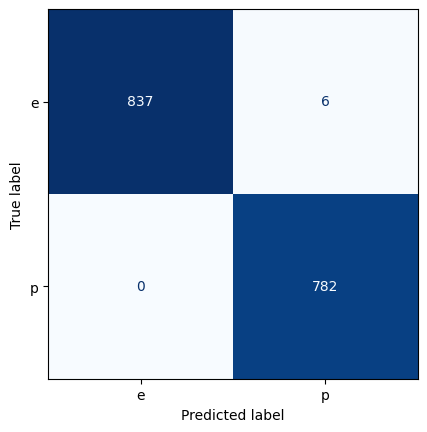

In [13]:
# plot confusion matrix using sklearn's ConfusionMatrixDisplay module
ConfusionMatrixDisplay.from_predictions(target_test, target_predicted, 
                                        display_labels=best_model.classes_,
                                        colorbar=False, 
                                        cmap="Blues")
plt.show()